In [2378]:
import pandas as pd
import numpy as np
from IPython.display import display
from matplotlib import pyplot as plt 
import seaborn as sns
from scipy import stats as st
from math import factorial
import math as mt

df = pd.read_csv('games.csv')

# Paso 2 Preparar los datos.

Se cambiaron los nombres de las columnas a minuscula usando un for 

In [2379]:
old_columns = df.columns

# paso 2 : columnas en minuscula 
for old_column in old_columns:
    lower_column = old_column.lower()
    df = df.rename(columns={old_column : lower_column})
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

se visualizan los datos

In [2380]:
#paso 2 : coversion de tipos
df.info()
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7582,DarkStar One: Broken Alliance,X360,2010.0,Simulation,0.11,0.07,0.00,0.02,63.0,7.2,T
7964,Tiger Woods PGA Tour 07,XB,2006.0,Sports,0.13,0.05,0.00,0.01,81.0,6.8,E
15926,Dream C Club: GoGo,PS3,2014.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15252,Zathura,XB,2005.0,Adventure,0.02,0.00,0.00,0.00,48.0,5.5,E10+
14187,Deer Drive: Legends,3DS,2012.0,Action,0.03,0.00,0.00,0.00,NaN,tbd,T
5463,NASCAR Thunder 2002,XB,2001.0,Racing,0.25,0.07,0.00,0.01,82.0,tbd,E
15657,Gon: BakuBakuBakuBaku Adventure,3DS,2012.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10011,Lost Horizon,PC,2010.0,Adventure,0.00,0.10,0.00,0.02,77.0,7.9,T
14441,Toaru Majutsu no Kagaku no Ensemble,PSP,2013.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
7163,Cloudy With a Chance of Meatballs,DS,2009.0,Platform,0.20,0.01,0.00,0.02,NaN,tbd,E


In [2381]:
print(df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [2382]:
df.duplicated().sum()

0

En la columna 'user_score' se está excluyendo el valor tbd(a determinar) para poder obtener la media, debido a que tbd es un string al poner el metodo describe entregaba la frecuencia, al excluir tbd se obtuvo la media, se remplazo los tbd y se lleno los NaN con la media de las criticas.

In [2383]:
display(df[~(df['user_score']=='tbd')]['user_score'].astype('float').describe())
mean_user = df[~(df['user_score']=='tbd')]['user_score'].astype('float').mean()
df['user_score']= df['user_score'].replace('tbd',mean_user).astype('float').fillna(mean_user)
display(df['user_score'].describe())

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

count    16715.000000
mean         7.125046
std          1.010753
min          0.000000
25%          7.125046
50%          7.125046
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

En la columna 'year_of_release' se eliminaron los NaN ya que solo representaba el 2% de dataframe, además se cambio a tipo 'int', no se cambio a formato datatime ya que no tenia ni dia ni mes solo contenia el año. 

In [2384]:
df.dropna(subset='year_of_release',inplace=True)
df['year_of_release']= df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16446 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


En la columna 'critic_score'se lleno los NaN con la media de la columna original 'critic_score', no se puede eliminar porque hay valores en el resto de las columnas. 

In [2385]:
display(df['critic_score'].describe())
mean_critic = df['critic_score'].mean()
df['critic_score']= df['critic_score'].fillna(mean_critic)
display(df['critic_score'].describe())

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

count    16446.000000
mean        68.994363
std          9.697952
min         13.000000
25%         68.994363
50%         68.994363
75%         70.000000
max         98.000000
Name: critic_score, dtype: float64

En la columna 'rating'se lleno los NaN con un str en blanco y no se puede eliminar porque hay valores de interes en el resto de la columnas del DataFrame, tambien se pudiera clasificar dependiendo del genero pero para efctos practicos del proyecto se va dejar en blanco. 

In [2386]:
display(df['rating'].unique())
df['rating']= df['rating'].fillna(' ')

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

se lleno el valor ausente de la columna 'name' con el string other(otros), se penso en eliminar pero al haber ventas se prefirio llenar el campo, además se elimina espacios en blanco de los strig. 

In [2387]:
df[(df['name'].isna())]
df['name']=df['name'].fillna('other').str.strip()

se lleno el valor ausente de la columna 'genre' con el str 'no_info'(sin información) se penso en eliminar pero al haber ventas se prefirio llenar el campo ausente, tambien Se elimina espacios en blanco. 

In [2388]:
df[(df['genre'].isna())]
df['genre']=df['genre'].fillna('no_info').str.strip()

Se elimina espacios en blanco de los nombres de las plataformas 

In [2389]:
df['platform']=df['platform'].str.strip()

se muestra nuevamente la informacion de DataFrame para verificar que se realizaron los cambios.

In [2390]:
print(df.info())
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2229,Kingdom Hearts Re:coded,DS,2010,Role-Playing,0.53,0.09,0.27,0.05,66.000000,7.000000,E10+
6271,Dragon Ball GT: Final Bout,PS,1997,Fighting,0.02,0.02,0.22,0.02,68.994363,7.125046,
4037,Mario & Wario,SNES,1993,Puzzle,0.00,0.00,0.49,0.00,68.994363,7.125046,
14253,The Italian Job,GC,2003,Racing,0.03,0.01,0.00,0.00,56.000000,7.125046,T
4130,Alien Trilogy,PS,1996,Shooter,0.24,0.16,0.04,0.03,68.994363,7.125046,
1548,The LEGO Movie Videogame,X360,2014,Action,0.69,0.47,0.00,0.11,69.000000,7.200000,E10+
16582,Irotoridori no Sekai: World's End Re-Birth,PSV,2015,Action,0.00,0.00,0.01,0.00,68.994363,7.125046,
11951,Emily the Strange: Strangerous,DS,2011,Action,0.04,0.02,0.00,0.01,68.994363,7.125046,E10+
6963,Viva Pinata: Party Animals,X360,2007,Misc,0.19,0.02,0.00,0.02,56.000000,6.200000,E
4120,Fortune Street,Wii,2011,Misc,0.25,0.03,0.17,0.02,68.000000,7.500000,E


se creo una nueva columna que se llama 'total_sales'

In [2391]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


# Paso 3 Analisis de datos.

Se pide analizar los lanzamientos de los juegos a través de los años, para ellos vamos a utilizar un histograma. 

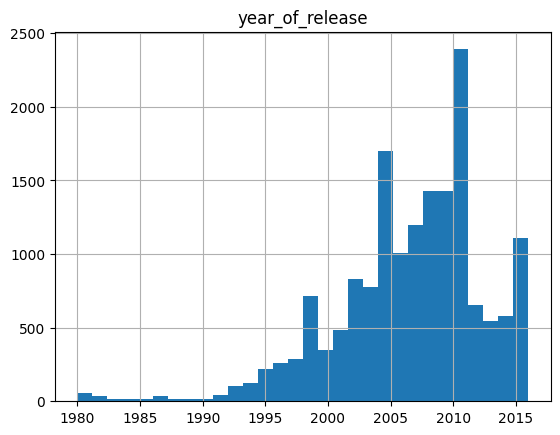

In [2392]:
df.hist(column= 'year_of_release', bins=30)
plt.show()

En el grafico se puede observar que el año de mayor lanzamiento fue el 2010 con 2400 juegos aproximadamente, el aumento en el lanzamiento de juegos comenzo a partir del 2005, de 1980 a 1995 el interes en los juegos y nuevos lanzamientos era muy bajo cercano a cero. 

***

Se pide observar las ventas por plataforma y elegir las plataformas con las mayores ventas basada en los datos por cada año, para esto se realiza un gráfico de barra para ver primero las plataformas que tuvieron más ventas. 

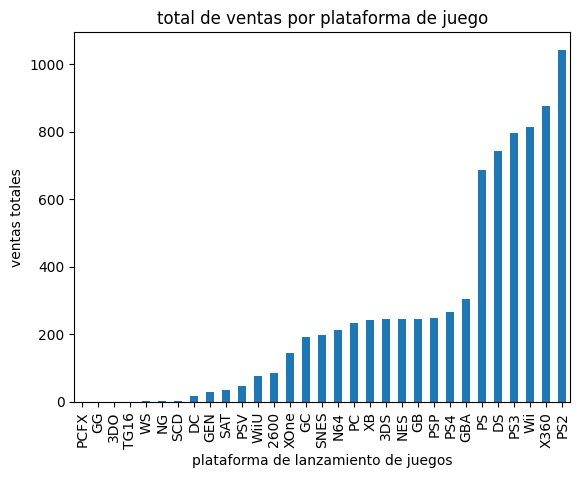

In [2393]:
uni_platform = df['platform'].unique()

df_tp=df.groupby("platform")['total_sales'].sum().sort_values()
df_tp.plot( kind='bar',title="total de ventas por plataforma de juego", xlabel="plataforma de lanzamiento de juegos", ylabel="ventas totales")
plt.show()

En el gráfico se observa que las plataformas de juegos con más ventas son PS, DS, PS3,Wii, X360 y PS2. 

ahora se va a realizar un groupby para agrupar las ventas según las plataformas y el año de lanzamiento, luego se hizo una tablas utilizando el método pivot_table de pandas donde se indicó cuál era el valor a tomar, el índice, las columnas y se finaliza con un gráfico de línea filtrando la tabla en las plataformas con más ventas, vista anteriormente en el gráfico de barras.  

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='platform')

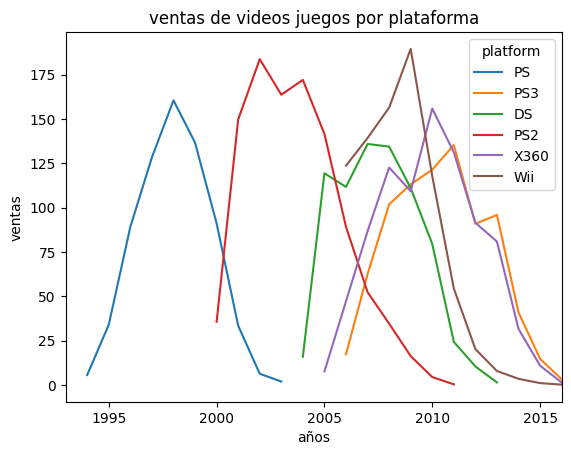

In [2394]:
df_ypt=df.groupby(["platform",'year_of_release'], as_index=False)['total_sales'].sum()
pivot_df_ypt = pd.pivot_table(data=df_ypt, values='total_sales', index='year_of_release', columns = 'platform')
display(p.columns)
pivot_df_ypt[['PS','PS3','DS','PS2','X360','Wii']].plot(xlim=[1993,2016],ylabel= 'ventas', xlabel= 'años' , title= 'ventas de videos juegos por plataforma')

plt.show()

viendo el gráfico de líneas podemos deducir que la vida de las plataformas es aproximadamente de 10 años y las nuevas plataformas tardan en aparecer 5 años en promedio desde el la ultima plataforma de juegos. 

***

se pide construir un modelo para el 2017, se estan tomando los años del 2005 en adelante para el modelo. 

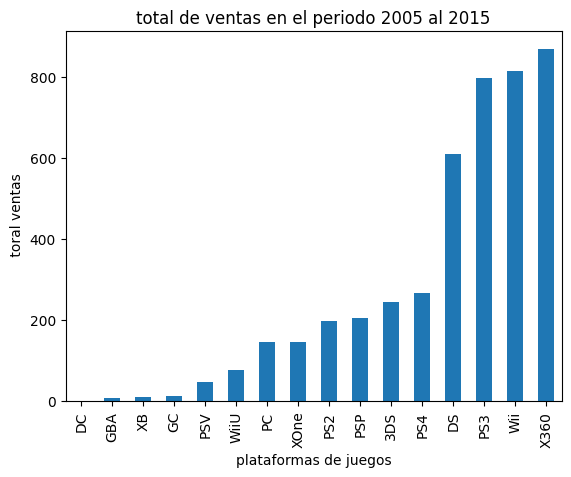

In [2395]:
proy_df= df.query('year_of_release> 2005')
proy_df2=proy_df.groupby('platform')['total_sales'].sum().sort_values()
proy_df2.plot(kind='bar', x='platform', y='total_sales', title='total de ventas en el periodo 2005 al 2015', ylabel=' toral ventas', xlabel='plataformas de juegos')
plt.show()

1. Se tomo el periodo de 2005 en adelante ya que es el periodo de la tercera generacion de consolas (PS3, Wii, X360) y es más proximo al periodo del 2017 que se quiere analizar, además ya habiamos determinado que el periodo de duracion de las plataformas de juegos duran alrededor de 10 años. 
2. las plataformas lideres en ventas son DS, PS3, Wii, X360.

se reliza gráfico de líneas para comparar ventas de las distintas plataformas por generación.

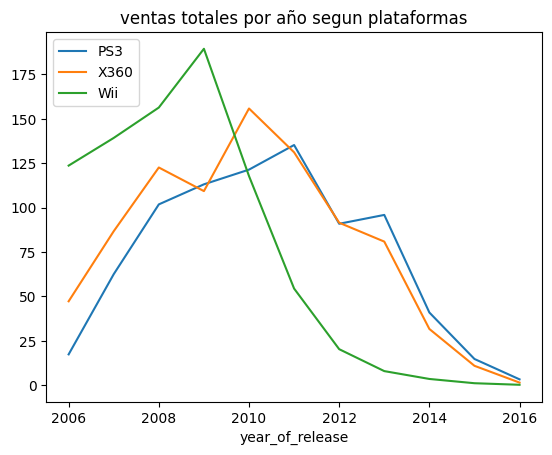

In [2396]:
p2=pivot_df_ypt.reset_index()
p2=p2.query('year_of_release>2005')[['year_of_release','PS3','X360', 'Wii']]
p2.plot(x='year_of_release', title= 'ventas totales por año segun plataformas')
plt.legend(loc='upper left') 
plt.show()

Wii fue la plataforma con mayor venta para la tercera generacion, seguida de X360 y PS3 pero estas se mantuvieron por más tiempo. 

se reliza gráfico de líneas para comparar ventas de las distintas plataformas por generación(4ta).

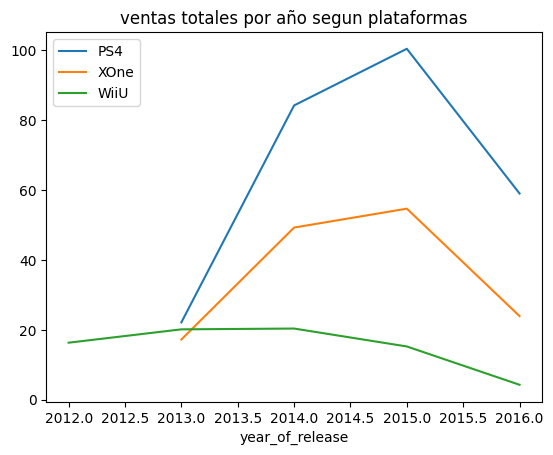

In [2397]:
p2=pivot_df_ypt.reset_index()
p2=p2.query('year_of_release>2005')[['year_of_release','PS4','XOne', 'WiiU']]
p2.plot(x='year_of_release', title= 'ventas totales por año segun plataformas')
plt.legend(loc='upper left') 
plt.show()

La plataforma con más ventas en la 4ta generación es PS4, seguido de XOne, WiiU no tuvo exito en el mercado. 

se reliza gráfico de líneas para comparar ventas de las distintas plataformas y su generación de salida y de entrada.

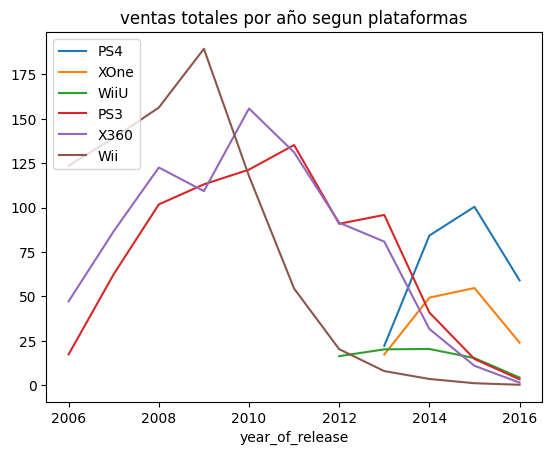

In [2398]:
p2=pivot_df_ypt.reset_index()
p2=p2.query('year_of_release>2005')[['year_of_release','PS4','XOne', 'WiiU','PS3','X360', 'Wii']]
p2.plot(x='year_of_release', title= 'ventas totales por año segun plataformas')
plt.legend(loc='upper left') 
plt.show()

se puede observar que 'PS3','X360', 'Wii' se redujeron sus ventas es la generacion que va de salida y 'PS4','XOne', 'WiiU' crecen ya que es la nueva generancion de consolas. 

las plataformas potencialmente rentables son las nuevas generaciones PS4 y XOne. 

 se pide crear un diagrama de para las ventas globales de todos los juegos

<Axes: ylabel='platform'>

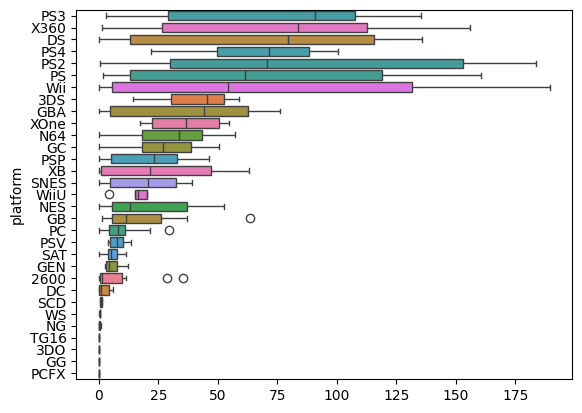

In [2399]:
orden = pivot_df_ypt.median().sort_values(ascending=False).index
sns.boxplot(pivot_df_ypt, orient="h", order=orden)

Mientras más exitosa es la plataforma más avariada es las ventas, la varianza de venta de la plataforma se mide con el IQR, que se traduce en que tan ancha es la caja. 

platform,PS4,XOne,WiiU,PS3,X360,Wii
count,4.000000,4.000000,5.000000,11.000000,11.000000,11.000000
mean,66.447500,36.262500,15.248000,72.431818,78.977273,73.951818
std,34.115468,18.469372,6.554202,46.897994,50.562829,72.202536
min,22.120000,17.210000,4.250000,3.230000,1.400000,0.170000
25%,49.787500,22.235000,15.220000,29.090000,39.405000,5.660000
50%,71.615000,36.585000,16.300000,90.870000,86.680000,54.370000
75%,88.275000,50.612500,20.120000,107.430000,115.910000,131.425000
max,100.440000,54.670000,20.350000,135.220000,155.800000,189.430000


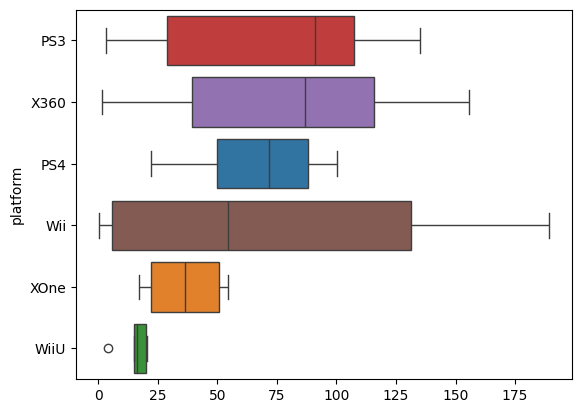

In [2400]:
p2=pivot_df_ypt#.reset_index()
orden = p2[['PS4','XOne', 'WiiU','PS3','X360', 'Wii']].median().sort_values(ascending=False).index
p2=p2.query('year_of_release>2005')[['PS4','XOne', 'WiiU','PS3','X360', 'Wii']]
sns.boxplot(p2, orient="h", order=orden)
p2.describe()

se puede observar que PS3 y X360 sus ventas fueron similares, solo que el promedio de ventas del PS3 fue ligeramente mayor estando en 90 y el de X360 en 86 aproximadamente , comparando Wii con estas dos plataformas podemos ver que el rango de precios de ventas fue mayor pero su media fue menor de 54, pero al mismo tiempo podemos observar que la maxima de Wii fue mas mas alta con 189 y Wiiu fue la peor plataforma en ventas ya que el rango de precio fue muy acotado su media esta al rededor de 16 y su maxima 20.

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular. Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. 

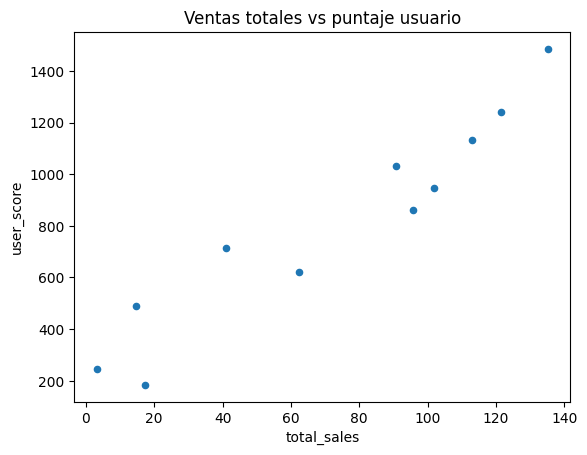

In [2401]:
score_df= df.groupby(['platform','year_of_release'], as_index=False)[['total_sales','user_score', 'critic_score']].sum().query('year_of_release>2005')
#display(score_df)
score_df.query(' platform == "PS3" ').plot(kind='scatter', x='total_sales', y='user_score', title='Ventas totales vs puntaje usuario' , xlabel= 'total_sales', ylabel='user_score' )
plt.show()

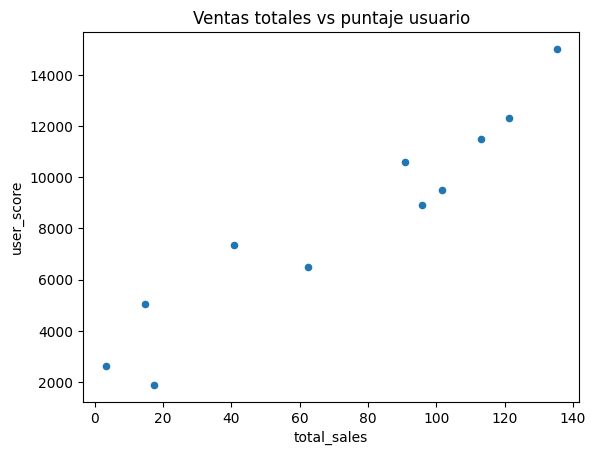

In [2402]:
score_df.query(' platform == "PS3" ').plot(kind='scatter', x='total_sales', y='critic_score', title='Ventas totales vs puntaje usuario' , xlabel= 'total_sales', ylabel='user_score' )
plt.show()

In [2403]:
score_df_PS3= score_df.query(' platform == "PS3" ')
print(score_df_PS3['total_sales'].corr(score_df_PS3['user_score']))

0.9528830781355686


el resultado de correlación nos indica que existe una correlación positiva fuerte entre las variables de critica y ventas ya que el resultado es muy cercano a 1. 

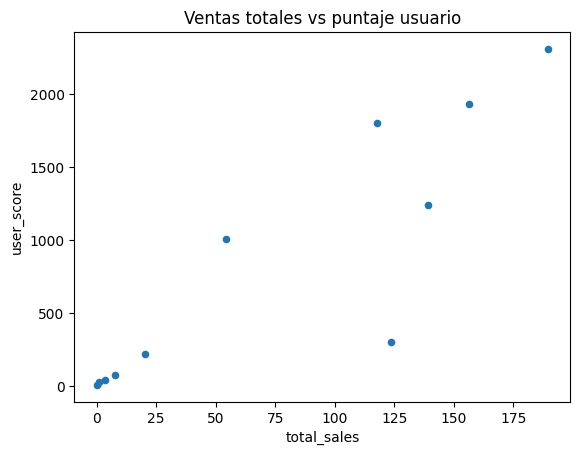

In [2404]:
score_df.query(' platform == "Wii" ').plot(kind='scatter', x='total_sales', y='user_score', title='Ventas totales vs puntaje usuario' , xlabel= 'total_sales', ylabel='user_score' )
plt.show()

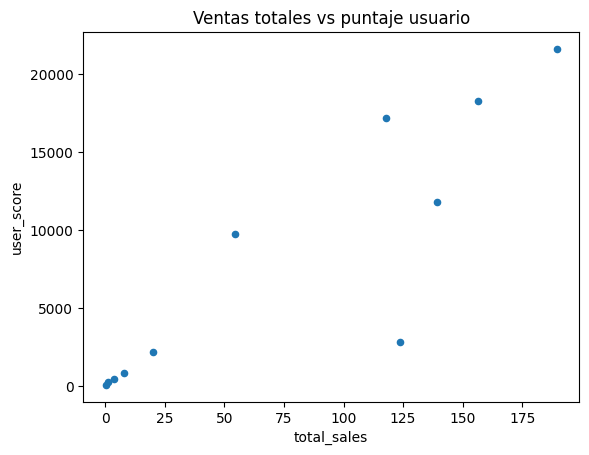

In [2405]:
score_df.query(' platform == "Wii" ').plot(kind='scatter', x='total_sales', y='critic_score', title='Ventas totales vs puntaje usuario' , xlabel= 'total_sales', ylabel='user_score' )
plt.show()

In [2406]:
score_df_Wii= score_df.query(' platform == "Wii" ')
print(score_df_Wii['total_sales'].corr(score_df_Wii['user_score']))

0.8815002550687542


Observando la correlación y la gráfica podemos ver que es una correlación positiva fuerte ya que esta por encima de 0,7 casi de 1. 

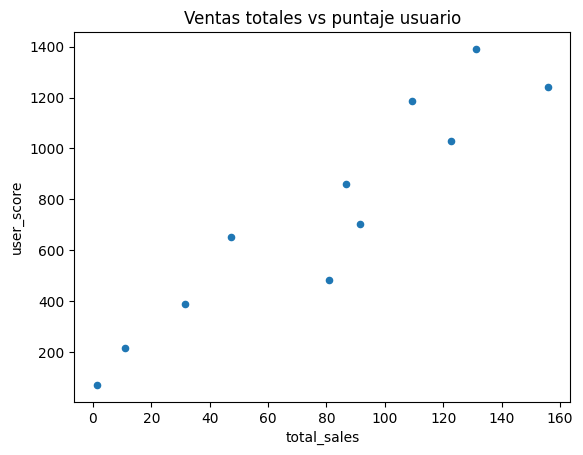

In [2407]:
score_df.query(' platform == "X360" ').plot(kind='scatter', x='total_sales', y='user_score', title='Ventas totales vs puntaje usuario' , xlabel= 'total_sales', ylabel='user_score' )
plt.show()

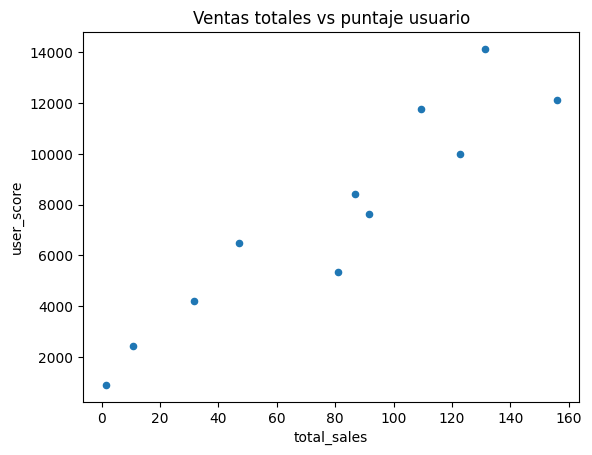

In [2408]:
score_df.query(' platform == "X360" ').plot(kind='scatter', x='total_sales', y='critic_score', title='Ventas totales vs puntaje usuario' , xlabel= 'total_sales', ylabel='user_score' )
plt.show()

In [2409]:
score_df_X360= score_df.query(' platform == "X360" ')
print(score_df_X360['total_sales'].corr(score_df_X360['user_score']))

0.9349431767445705


podemos observar en el gráfivo y el metodo .corr() tienen correlación positiva fuerte de 0.9349431767445705 casi de 1,  las criticas y las ventas van de la mano y una variable afecta a la otra a mejor critica mayores ventas ya que los usuarios tienden consumir mas los juegos de dichas plataformas con mejores criticas. 

vamos a comparar las ventas de los mismo juegos en otras plataformas. se va utilizar el groupby para filtrar el dataframe con la informacion que necesitamos, un query para filtrar los años del 2005 al ultimo año registrado y luego lo pasaremos a una tabla. 

In [2410]:
df_2005= df.query('year_of_release>2005')
gamer_df = df_2005.groupby('name')['total_sales'].sum().reset_index().sort_values(by='name' , ascending=False)
pivot_gamer_df = pd.pivot_table(data=df_2005, values='total_sales', index='name', columns = 'platform',fill_value=0).reset_index().sort_values(by='name' , ascending=False)
pivot_gamer_df['#_total_sales'] = gamer_df['total_sales']
pivot_gamer_df = pivot_gamer_df.sort_values(by='#_total_sales' , ascending=False)
display(pivot_gamer_df.head())

platform,name,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne,#_total_sales
6513,Wii Sports,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,74.09,0.0,0.00,0.0,0.0,74.09
2139,Grand Theft Auto V,0.0,0.0,0.0,0.0,0.0,1.08,0.0,17.09,10.65,0.0,0.0,0.00,0.0,14.86,0.0,5.0,48.68
3347,Mario Kart Wii,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,32.23,0.0,0.00,0.0,0.0,32.23
6515,Wii Sports Resort,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,29.82,0.0,0.00,0.0,0.0,29.82
728,Call of Duty: Modern Warfare 3,0.0,0.0,0.0,0.0,0.0,1.39,0.0,11.76,0.00,0.0,0.0,0.75,0.0,13.41,0.0,0.0,27.31


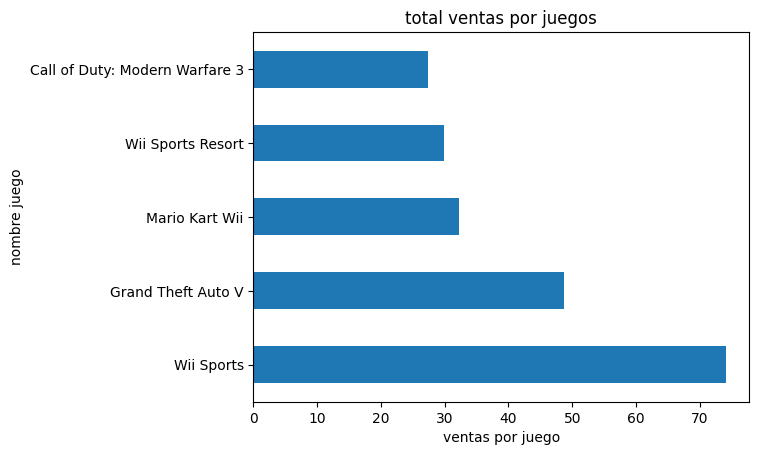

In [2411]:
pivot_gamer_df.head().plot(kind= 'barh', x= 'name' , y='#_total_sales', title='total ventas por juegos',ylabel= 'nombre juego', xlabel='ventas por juego', legend =False)
plt.show()

este grafico es un top 5 de los juegos más vendidos, de este top de juegos vamos a evaluar pero desde ya podemos notar que Wii Sports fue un juego muy exitoso a pesar que solo se vendio en la plataforma Wii.

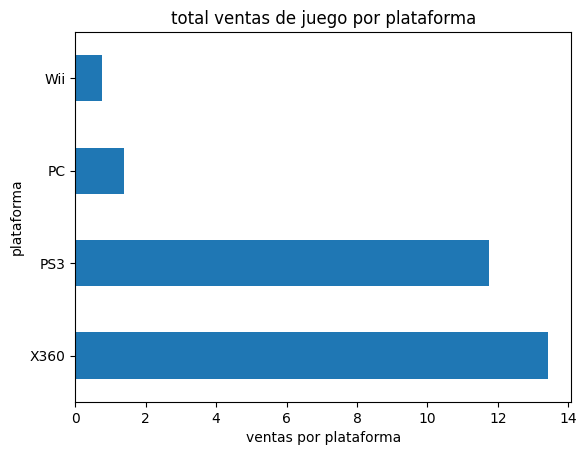

In [2412]:
game = 'Call of Duty: Modern Warfare 3'
df_2005.query('name == @game').plot(kind= 'barh',x='platform', y='total_sales', title='total ventas de juego por plataforma',ylabel= 'plataforma', xlabel='ventas por plataforma', legend =False)
plt.show()

podemos ver en el gráfico que 'Call of Duty: Modern Warfare 3' se vendio en 4 plataforma pero en donde obtuvo más ventas fue en X360 con 13, 5 aproximadamente seguido de PS3 con 12, luego vemos PC que las ventas fueron bajas con casi 2 millones y por ultimo Wii que fue la venta más baja con menos de 2. 

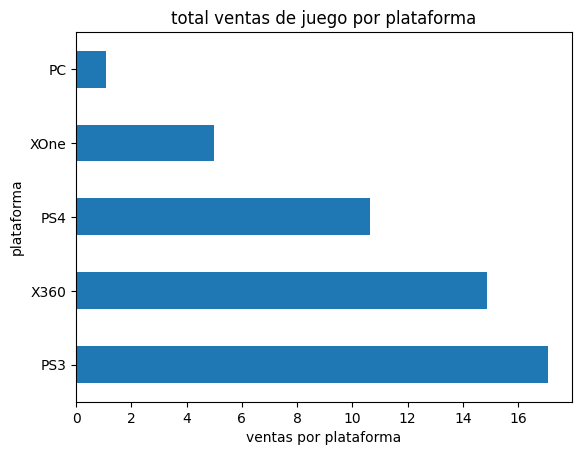

In [2413]:
game = 'Grand Theft Auto V'
df_2005.query('name == @game').plot(kind= 'barh',x='platform', y='total_sales', title='total ventas de juego por plataforma',ylabel= 'plataforma', xlabel='ventas por plataforma', legend =False )
plt.show()

en este gráfico estamos analizando las ventas por flataforma de 'Grand Theft Auto V' este juego en la plataforma que más vendio es PS3  con 17, seguido de X360 con 15, luego PS4 con 11 aproximadamente, despues por XOne con 5 millones y por ultimo PC con un millon aproximadamente. 

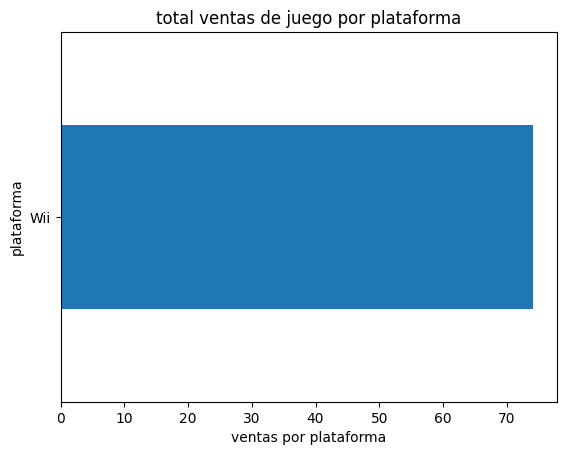

In [2414]:
game = 'Wii Sports'
df_2005.query('name == @game').plot(kind= 'barh',x='platform', y='total_sales',title='total ventas de juego por plataforma',ylabel= 'plataforma', xlabel='ventas por plataforma', legend =False)
plt.show()

en este gráfico podemos ver que 'Wii Sports' es un juego exclusivo de Wii a pesar de que solo se vendio en esta plataforma fue un juego muy exitoso ya que logró vender en esta sola plataforma alrededor de 75 millones. 

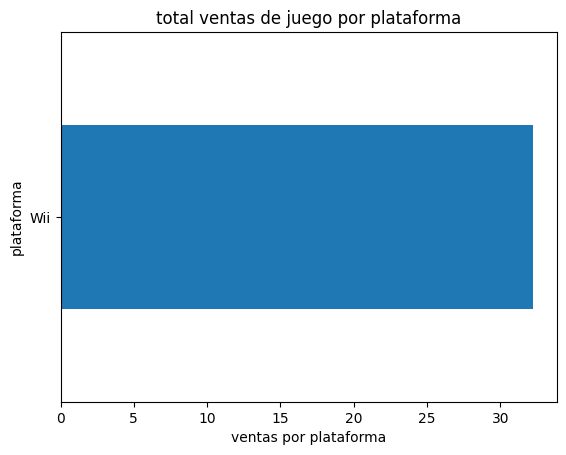

In [2415]:
game = 'Mario Kart Wii'
df_2005.query('name == @game').plot(kind= 'barh',x='platform', y='total_sales',title='total ventas de juego por plataforma',ylabel= 'plataforma', xlabel='ventas por plataforma', legend =False)
plt.show()

Mario Kart Wii al igual que 'Wii Sports' solo se vendio en Wii, tambien tuvo buenas ventas a pesar de que solo se vendio en dicha plataforma logrando alcanzar más de 35 millones en ventas. 

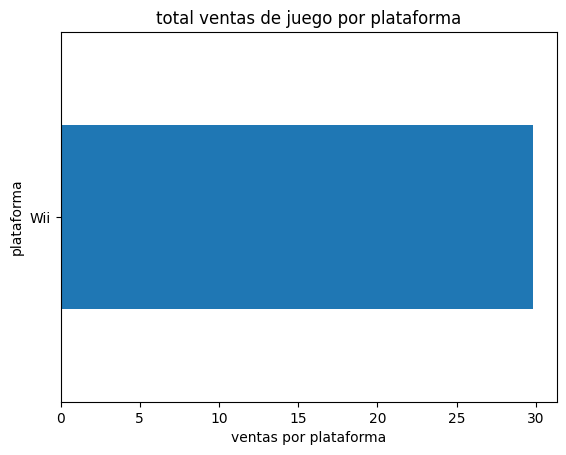

In [2416]:
game = 'Wii Sports Resort'
df_2005.query('name == @game').plot(kind= 'barh',x='platform', y='total_sales',title='total ventas de juego por plataforma',ylabel= 'plataforma', xlabel='ventas por plataforma', legend =False)
plt.show()

podemos observar en el gráfico que 'Wii Sports ResortWii' también es un juego explusivo de la plataforma Wii, este juego no se vendio en otras plataforma y a pesar de esto logro vender alrededor de 30 millones.

Podemos cuncluir que Wii es una de las plataformas más rentables y estables con exelentes ventas ya que 3 del top de mejores juegos vendidos son exlusivos de Wii.

,genre,name,total_sales
0,Action,2382,983.21
10,Sports,1262,697.16
8,Shooter,737,631.37
3,Misc,1253,496.47
7,Role-Playing,996,480.63
6,Racing,562,259.52
4,Platform,340,251.07
9,Simulation,606,200.84
2,Fighting,413,165.55
1,Adventure,1023,128.95


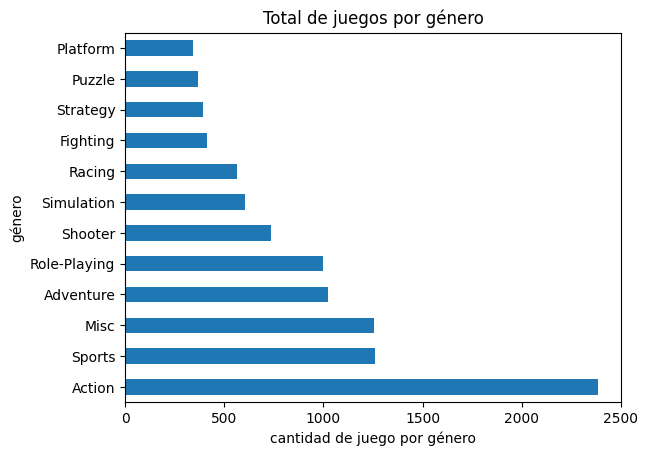

In [2417]:
genre_df = df_2005.groupby('genre', as_index=False).agg({'name':'count','total_sales':'sum'}).sort_values(by='total_sales' , ascending=False)
display(genre_df)
genre_df.sort_values(by='name' , ascending=False).plot(kind='barh' , y='name' , x='genre', legend= False, title= 'Total de juegos por género', xlabel='cantidad de juego por género', ylabel='género')
plt.show()


el gráfico nos muestra que el genero que más juegos tiene es el de action con 2400 juegos, seguido por sports con casi la mitad 1250 aproximadamente, luego vemos adventure con 1000, tambien vemos role-playing con 950 aproximadamnete, disparo con menos de 1000 hasta llegar a puzzle con 400 juegos aproximadamente. 

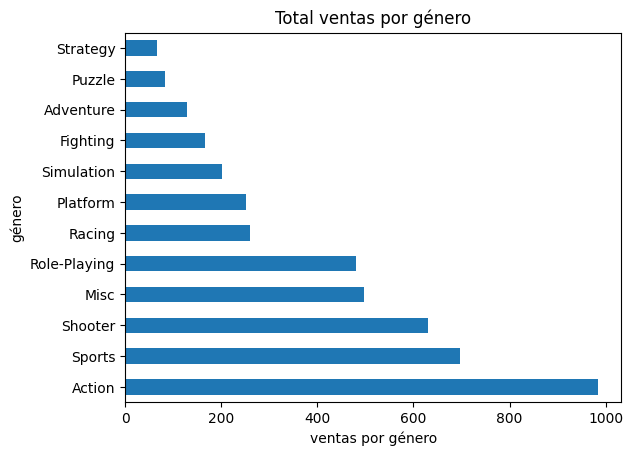

In [2418]:
genre_df.sort_values(by='total_sales' , ascending=False).plot(kind='barh' , y='total_sales' , x='genre', legend= False, title= 'Total ventas por género', xlabel='ventas por género', ylabel='género')
plt.show()

en este grafico vemos las ventas de juegos por género, action es el género que más vende con 900 millones, seguido de sports con 700 millones aproximadamnete, a diferencia del grafico de cantidad de juegos por genero aqui shooter ocupa el 3er lugar con ventas de 650 aproximadamente, los puestos de los generos no varian mucho a comparacion con el grafico de cantidad de juegos por género. 

***

# Paso 4. Crea un perfil de usuario para cada región 

Se pide las cinco plataformas principales y sus cuotas de mercado en las regiones. Para este caso se saca el top 5 por region para ver las 5 primeras plataformas por region luego se transpone para ver el numero de ventas de las plataformas por regiones

Top plataformas de na_sales


,na_sales
platform,
X360,588.84
Wii,486.87
PS3,390.13
DS,323.99
PS2,114.89


,X360,Wii,PS3,DS,PS2
region,,,,,
na_sales,588.84,486.87,390.13,323.99,114.89
jp_sales,12.02,68.28,79.41,141.49,35.93
eu_sales,267.89,258.32,327.21,142.99,46.28
other_sales,84.24,77.71,134.59,46.88,68.7


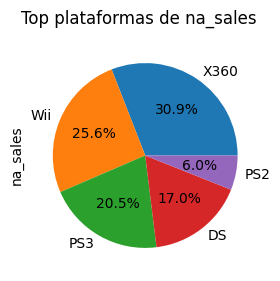

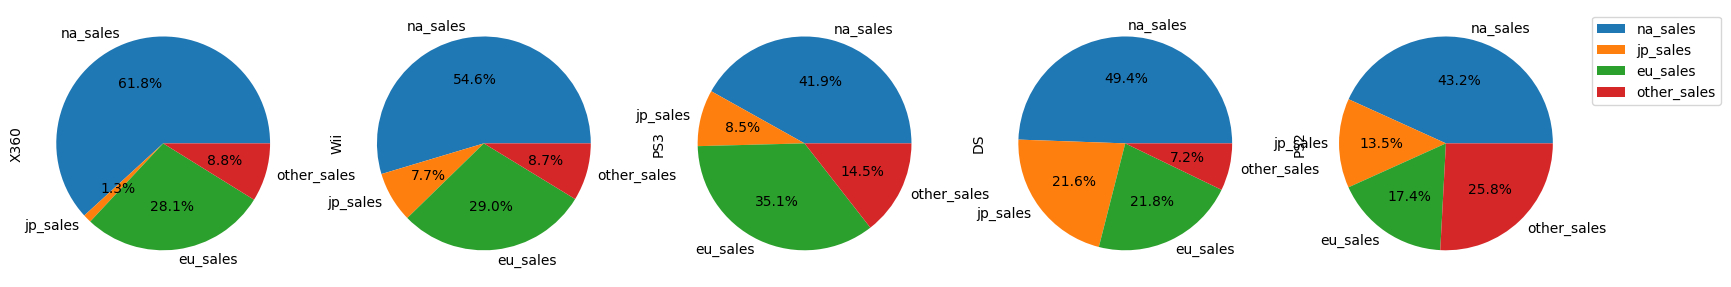

Conclusion de Norte America
las plataformas más vendidas en América fueron X360, Wii, PS3, DS y PS2, pero si observamos el nivel de venta de América con respecto a las
otras regiones podemos ver que está por encima del resto de las regiones en ventas en todas las plataformas, seguido por Europa con un 
comportamiento similar ocupando el 2do puesto en % de cuota de mercado, a excepción de las ventas de DS que el % de ventas de Japón y Europa 
son similares, también podemos ver que para PS2 fue otra excepción siendo el 2do en cuota de mercado el Resto del Mundo con la mayor venta 
después de América.
_________________________________________________________________________________________________________________________

Top plataformas de jp_sales


,jp_sales
platform,
DS,141.49
3DS,100.62
PS3,79.41
PSP,70.63
Wii,68.28


,DS,3DS,PS3,PSP,Wii
region,,,,,
na_sales,323.99,82.65,390.13,80.54,486.87
jp_sales,141.49,100.62,79.41,70.63,68.28
eu_sales,142.99,61.27,327.21,54.21,258.32
other_sales,46.88,13.27,134.59,33.25,77.71


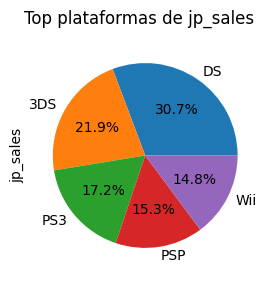

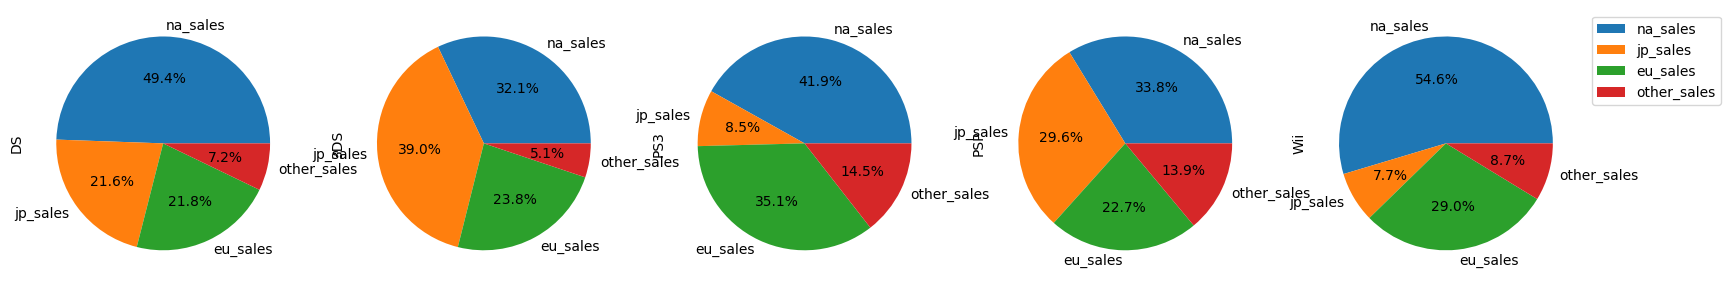

Conclusion de Japon
las plataformas con más ventas son DS, 3DS, PS3, PSP y Wii, DS está posicionada como la plataforma con más ventas, pero a pesar de ello su cuota
de mercado en relación a las otras regiones está por debajo de América y casi a la par de Europa, si vamos a las gráficas podemos ver que Japón
fue una excepción a la regla en varias plataformas como 3DS que se vendió más en Japón y su cuota de mercado fue más grande en comparación al 
resto de las regiones, para PS3 ocupa la 3ra posición a nivel de ventas de plataformas en Japón, pero comparado con el resto de las regiones
su cuota es baja, PSP también entra en el top 5 de ventas con una cuota de mercado de 29,9% estando América por encima en ventas, pero en el 
resto de las regiones no entra en el top de ventas y por último esta Wii con una cuota de mercado baja de 7,7% similar a PSP en Japón.
_________________________________________________________________________________________________________________________

Top pla

,eu_sales
platform,
PS3,327.21
X360,267.89
Wii,258.32
DS,142.99
PS4,141.09


,PS3,X360,Wii,DS,PS4
region,,,,,
na_sales,390.13,588.84,486.87,323.99,108.74
jp_sales,79.41,12.02,68.28,141.49,15.96
eu_sales,327.21,267.89,258.32,142.99,141.09
other_sales,134.59,84.24,77.71,46.88,48.35


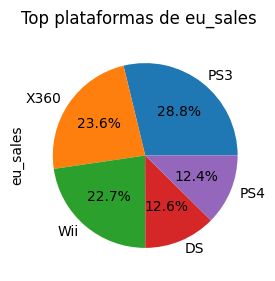

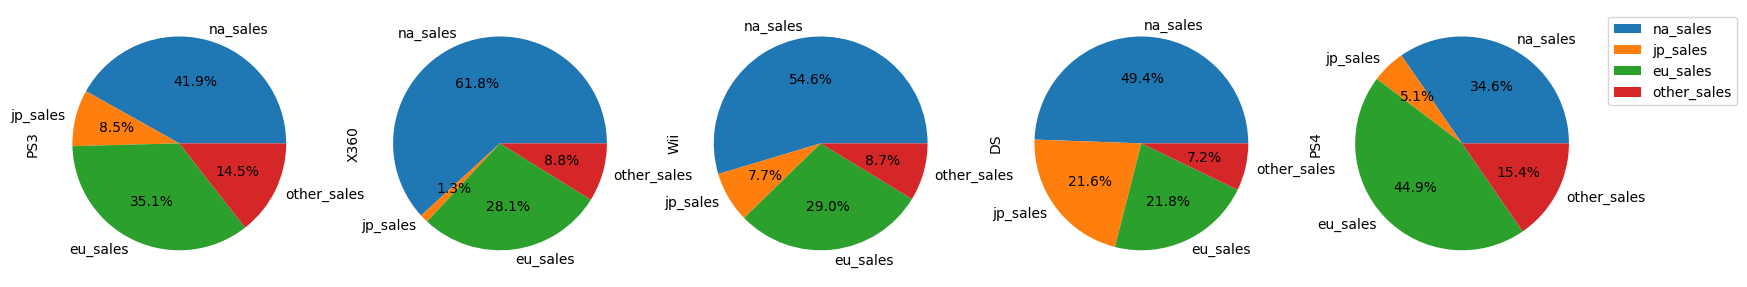

Conclusion de Europa
el top 5 de el top 5 de ventas de Europa está conformado por PS3, X360, Wii, DS y PS4, PS3 fue la mejor venta para Europa su cuota de mercado es la 2da
mejor con 35,1%, para X360 podemos observar que las dos regiones donde más ventas obtuvo fue América y Europa, en Japón su éxito fue muy bajo
con 1,3% en ventas, para Wii Europa mantiene su posición de mercado como en las otras plataformas siendo la 2da en ventas, DS entro también en 
el top de ventas en Europa con una cuota de 21,8% casi igualado a la de Japón, por último, tenemos a PS4 siendo la única excepción donde la cuota
de mercado es las más alta en comparación a la venta en las otras regiones esta plataforma en Japón no entro en el top 5 de ventas.
_________________________________________________________________________________________________________________________

Top plataformas de other_sales


,other_sales
platform,
PS3,134.59
X360,84.24
Wii,77.71
PS2,68.70
PS4,48.35


,PS3,X360,Wii,PS2,PS4
region,,,,,
na_sales,390.13,588.84,486.87,114.89,108.74
jp_sales,79.41,12.02,68.28,35.93,15.96
eu_sales,327.21,267.89,258.32,46.28,141.09
other_sales,134.59,84.24,77.71,68.7,48.35


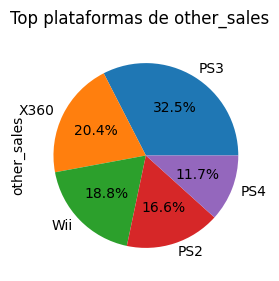

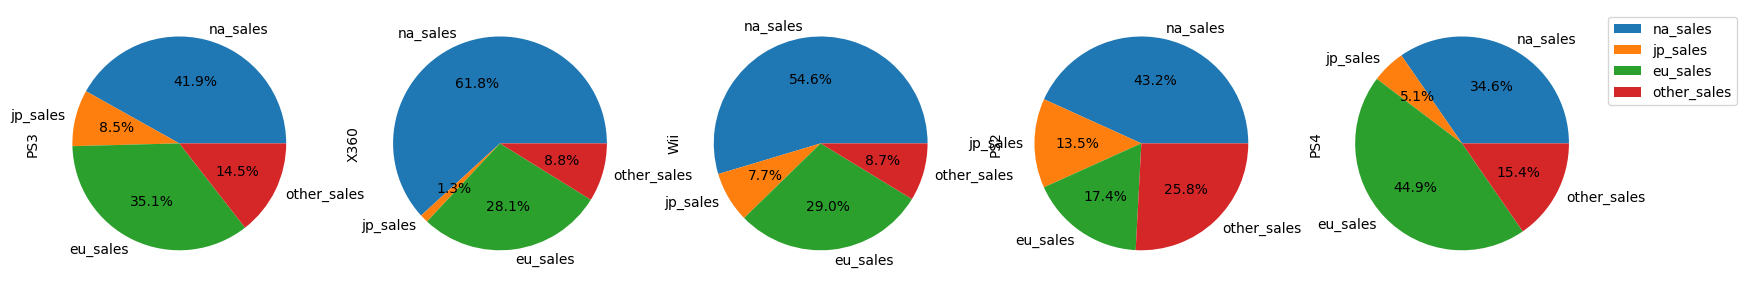

Conclusion del Resto del mundo
El top en ventas son PS3, X360, Wii, PS2 y PS4, para el resto PS3 es el número uno en ventas ocupando la 3ra cuota de mercado con 14,5%, X360
ocupa el segundo lugar en el top de ventas, pero su cuota de mercado como la mayoría de las plataformas se encuentra en el 3era puesto con un % 
bajo de 8,7%, pero aun así entrando en el top 5 de ventas, yendo a la gráfica vemos a Wii en la 3era posición con una cuota de mercado muy 
similar a X360, luego nos encontramos con PS2 que al igual que en América entra en el top 5 ocupando el 2do lugar de cuota de mercado más alta,
 ya para finalizar vemos PS4 con un % del 15,4 ocupando nuevamente el 3er lugar en ventas a nivel regional, podemos resaltar que todas las
 generaciones de PS2, PS3 y PS4 entraron en el top venta del Resto del mundo siendo una de las plataformas con más ventas y confiables.

_________________________________________________________________________________________________________________________


In [2419]:
# se crea una variable con un diccionario y se escribe las conslusiones por region.
conclusiones = {'na_sales': """Conclusion de Norte America
las plataformas más vendidas en América fueron X360, Wii, PS3, DS y PS2, pero si observamos el nivel de venta de América con respecto a las
otras regiones podemos ver que está por encima del resto de las regiones en ventas en todas las plataformas, seguido por Europa con un 
comportamiento similar ocupando el 2do puesto en % de cuota de mercado, a excepción de las ventas de DS que el % de ventas de Japón y Europa 
son similares, también podemos ver que para PS2 fue otra excepción siendo el 2do en cuota de mercado el Resto del Mundo con la mayor venta 
después de América.""",
                'jp_sales': """Conclusion de Japon
las plataformas con más ventas son DS, 3DS, PS3, PSP y Wii, DS está posicionada como la plataforma con más ventas, pero a pesar de ello su cuota
de mercado en relación a las otras regiones está por debajo de América y casi a la par de Europa, si vamos a las gráficas podemos ver que Japón
fue una excepción a la regla en varias plataformas como 3DS que se vendió más en Japón y su cuota de mercado fue más grande en comparación al 
resto de las regiones, para PS3 ocupa la 3ra posición a nivel de ventas de plataformas en Japón, pero comparado con el resto de las regiones
su cuota es baja, PSP también entra en el top 5 de ventas con una cuota de mercado de 29,9% estando América por encima en ventas, pero en el 
resto de las regiones no entra en el top de ventas y por último esta Wii con una cuota de mercado baja de 7,7% similar a PSP en Japón.""",
                'eu_sales': """Conclusion de Europa
el top 5 de el top 5 de ventas de Europa está conformado por PS3, X360, Wii, DS y PS4, PS3 fue la mejor venta para Europa su cuota de mercado es la 2da
mejor con 35,1%, para X360 podemos observar que las dos regiones donde más ventas obtuvo fue América y Europa, en Japón su éxito fue muy bajo
con 1,3% en ventas, para Wii Europa mantiene su posición de mercado como en las otras plataformas siendo la 2da en ventas, DS entro también en 
el top de ventas en Europa con una cuota de 21,8% casi igualado a la de Japón, por último, tenemos a PS4 siendo la única excepción donde la cuota
de mercado es las más alta en comparación a la venta en las otras regiones esta plataforma en Japón no entro en el top 5 de ventas.""",
                'other_sales': """Conclusion del Resto del mundo
El top en ventas son PS3, X360, Wii, PS2 y PS4, para el resto PS3 es el número uno en ventas ocupando la 3ra cuota de mercado con 14,5%, X360
ocupa el segundo lugar en el top de ventas, pero su cuota de mercado como la mayoría de las plataformas se encuentra en el 3era puesto con un % 
bajo de 8,7%, pero aun así entrando en el top 5 de ventas, yendo a la gráfica vemos a Wii en la 3era posición con una cuota de mercado muy 
similar a X360, luego nos encontramos con PS2 que al igual que en América entra en el top 5 ocupando el 2do lugar de cuota de mercado más alta,
 ya para finalizar vemos PS4 con un % del 15,4 ocupando nuevamente el 3er lugar en ventas a nivel regional, podemos resaltar que todas las
 generaciones de PS2, PS3 y PS4 entraron en el top venta del Resto del mundo siendo una de las plataformas con más ventas y confiables.
"""
                }
# se crea una variable para filtrar el DataFrame con los años del 2005 en adelante, se agrupa por plataforma y se suman las ventas por region.
regional_platform = df_2005.groupby('platform').agg(
    {'na_sales': 'sum', 'jp_sales': 'sum', 'eu_sales': 'sum', 'other_sales': 'sum'}).reset_index()
# se crea una variable de un diccionario con las regiones para que se pueda iterar
regiones = ['na_sales', 'jp_sales', 'eu_sales', 'other_sales']
for region in regiones:
    title = (f'Top plataformas de {region}')
    print(title)
    # se crea una variable con el top de plataforma en ventas
    top5_region_df = regional_platform.nlargest(5, region)
    # se crea una variable para filtar por plataforma y region y se coloca como indice plataformas
    region_df = top5_region_df[['platform', region]].set_index('platform')
    display(region_df)
    print()
    # se crea una variable y se guarda el top 5 de plataformas por regiones pero transpuesto y se resetea el indice
    region_df_tsp = top5_region_df.transpose().reset_index()
    # se crea una variable y se saca el primer registro como diccionario para posteriormente colocarlo como columna
    columnas_nuevas = region_df_tsp.iloc[0].to_dict()
    # Renombrar las columnas utilizando el diccionario y se remplaza
    region_df_tsp.rename(columns=columnas_nuevas, inplace=True)
    # se indexa desde la segunda fila hasta la ultima, se resetea el indice , luego se renombra la columna 'platform':'region' y por ultimo se indexa por region
    region_df_tsp = region_df_tsp.iloc[1:].reset_index(drop=True).rename(
        columns={'platform': 'region'}).set_index('region')
    display(region_df_tsp)
    # se plotea el grafico de torta dos veces para que plotee regional_df y regional_df_tsp
    region_df.plot.pie(subplots=True, autopct='%1.1f%%',
                       figsize=(5, 3), title=title, legend=False)
    region_df_tsp.plot.pie(subplots=True, figsize=(
        20, 30), autopct='%1.1f%%', legend=False)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.show()
    # por ultimo se muestran las conclusiones de la variable conclusiones por region
    print(conclusiones[region])
    print("_________________________________________________________________________________________________________________________\n")

Se nos pide los cinco generos principales para las regiones, para ellos vamos a realizar un groupby para agrupar por genero segun sus ventas

Top géneros de na_sales


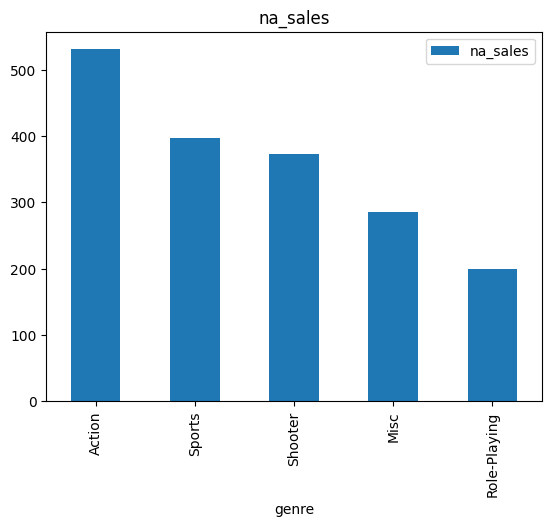

Top géneros de jp_sales


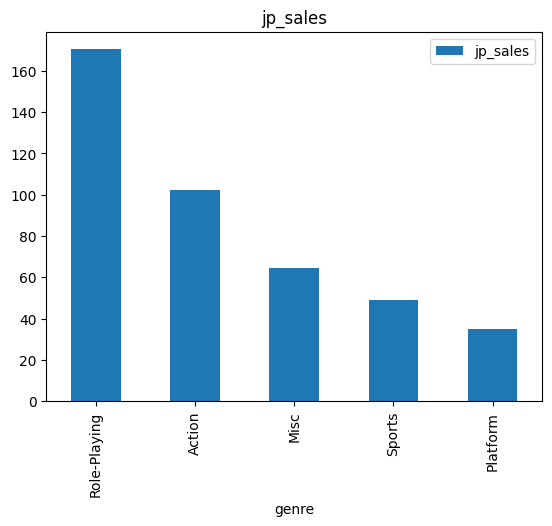

Top géneros de eu_sales


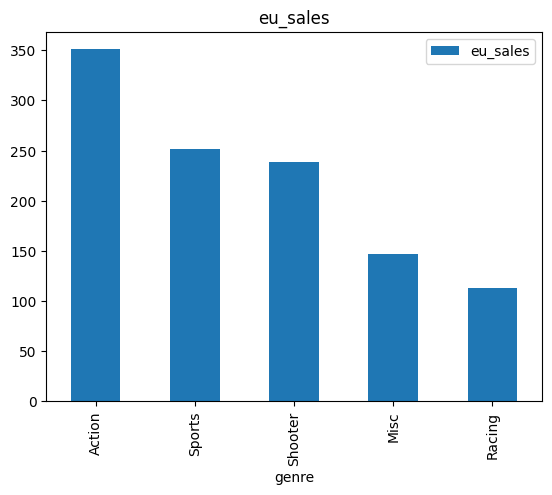

Top géneros de other_sales


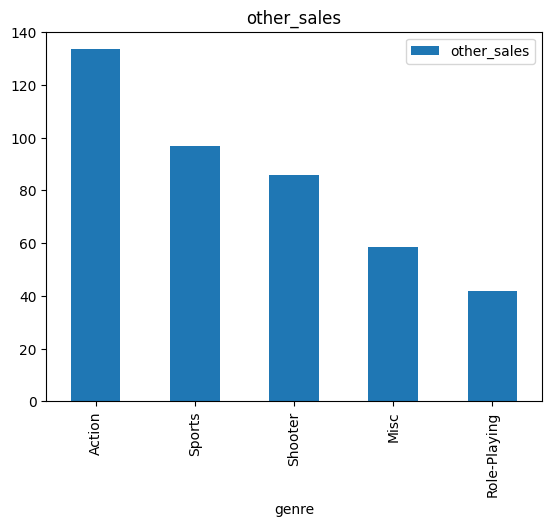

In [2420]:
genre_platform = df_2005.groupby('genre').agg({'na_sales':'sum','jp_sales':'sum', 'eu_sales':'sum','other_sales':'sum' }).reset_index().sort_values(by='genre' , ascending=False)
regiones = ['na_sales', 'jp_sales', 'eu_sales', 'other_sales']
for genre_p in regiones:
    print(f'Top géneros de {genre_p}')
    top_genre_platform = (genre_platform.nlargest(5, genre_p)[['genre',genre_p]])
    top_genre_platform.plot(kind='bar', x='genre', y=genre_p, title=genre_p)
    plt.show()

Si vamos a ver el grafico de los géneros por región podemos ver que América y Otros comparten el mismo top 5 de plataformas siendo Action la numero uno en ventas, seguido de sports, shooter, misc y role-playing, la diferencia clara entre estas dos regiones es el número de ventas ya que América llega a 500 ventas y Otros a 140, estando muy por debajo de las ventas de América, también podemos observar que Europa comparte el mismo top 5 de géneros a excepción del último género que ya no es role-playing sino racing, las ventas de Europa duplican aproximadamente las ventas de otros pero sigue estando por debajo de América ya que esta región es indiscutiblemente la región con más ventas.  En cuanto a Japon su top 5 es muy distinto a  las otras plataformas, el género más vendido es role-playing con 150 ventas aproximadamente, seguido de action, Misc, sports y platform; el mercado de Japón se comporta muy distinto a resto de las regiones.

***

las clasificaciones de ESRB afectan a las ventas en regiones individuales.

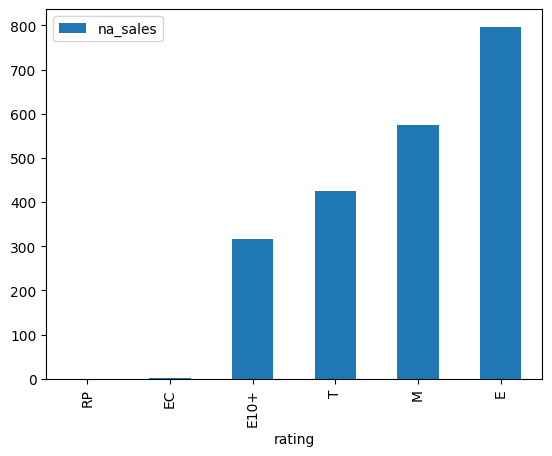

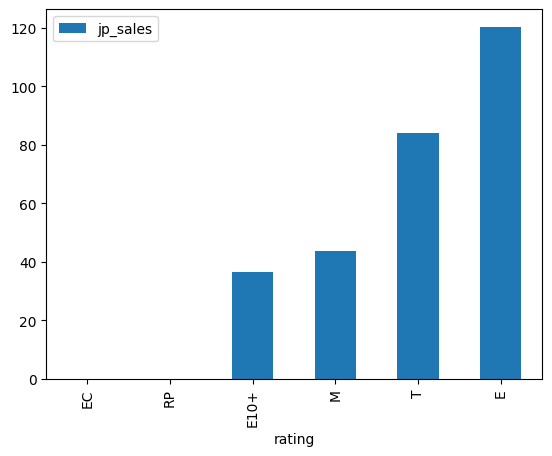

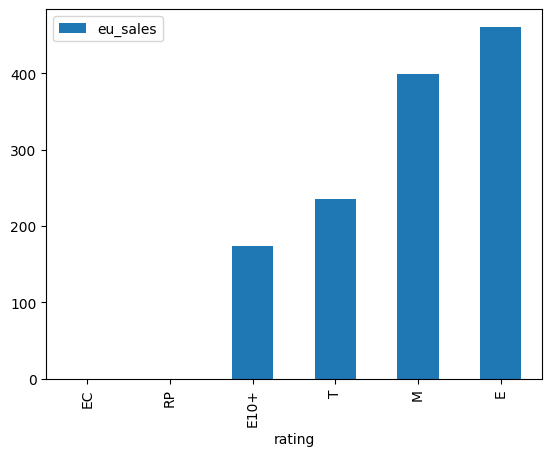

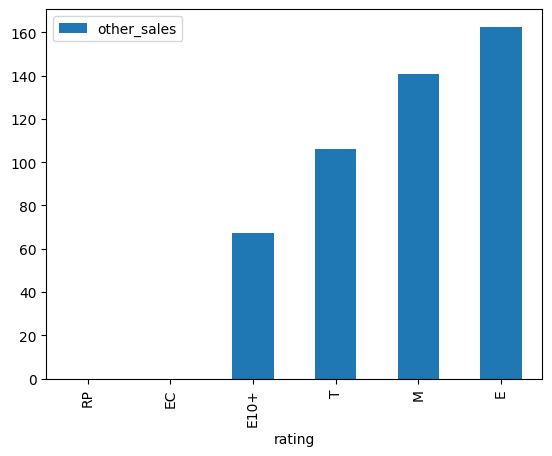

In [2421]:
rating_sales = df_2005.groupby('rating').agg({'na_sales':'sum','jp_sales':'sum', 'eu_sales':'sum','other_sales':'sum' }).reset_index()
rating_sales =(rating_sales.iloc[1:])
for rating_s in ['na_sales','jp_sales', 'eu_sales','other_sales']:

   rating_sales.sort_values(rating_s).plot(kind='bar', x='rating', y=rating_s)
   plt.show()

En esta oportunidad podemos observar que los juegos calificados con la letra E(todos) son los juegos con más ventas, ocupando el primer puesto del top 5 en ventas para todas la regiones, las regiones de América, Europa y Otros comparten el mismo top 5 siendo M(maduros) la 2da clasificación con más ventas, seguido de T(adolescentes) ocupa el 3er puesto en ventas, en el puesto número 4 vemos E10+(mayores de 10), para América vemos que hay una 5ta posición con pocas ventas EC(menores de 6 años) como es habitual las Ventas de América superan las ventas de las demás regiones seguide de Europa, otros y Japón. en cuanto a la clasificación para Japón es un poco distinta los juegos con la clasificación E se mantiene como los más vendidos, seguido en esta región por T, luego por M y finaliza con E10+.

***

# Paso 5. Prueba las siguientes hipótesis

 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

6.680275292975522

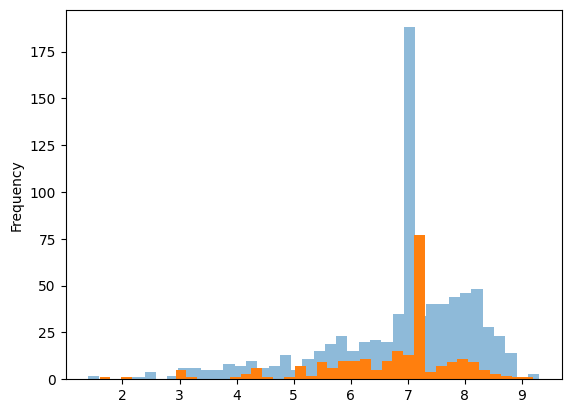

valor p:  0.02962634389981506
Rechazamos la hipótesis nula


In [2422]:
# H0= el promedio de los usuarios para las plataformas Xbox One y PC son las mismas
# H1= el promedio de los usuarios para las plataformas Xbox One y PC son distintas

display(df_2005.query('platform == "XOne"')['user_score'].mean())
XOne_user_score= df_2005.query('platform == "XOne"')['user_score']

PC_user_score= df_2005.query('platform == "PC"')['user_score']
PC_user_score.plot.hist(y='user_score', bins=40, alpha=0.5)
XOne_user_score.plot.hist(y='user_score', bins=40)
plt.show()

alpha=0.05

results = st.ttest_ind(XOne_user_score,PC_user_score)

print('valor p: ', results.pvalue) 

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Rechazamos la hipótesis ya que sus medias no son iguales.
en cuanto a la formulación se plantea la media de XOne igual a la media de PC , siendo H0 el statu quo donde las medias son iguales y la hipótesis alternativa el negado de H0.

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

nan

16       8.200000
23       8.100000
42       8.300000
46       7.125046
51       7.900000
           ...   
16680    7.125046
16691    7.125046
16692    7.600000
16699    7.125046
16710    7.125046
Name: user_score, Length: 2382, dtype: float64

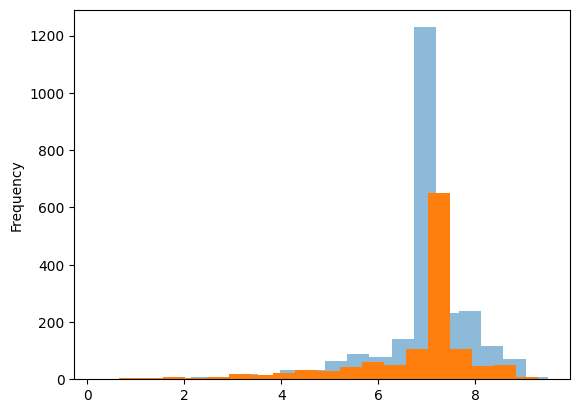

valor p:  4.024721626361058e-10
Rechazamos la hipótesis nula


In [2423]:
# H0= el promedio de los usuarios para los géneros acción y deposte son diferentes
# H1= el promedio de los usuarios para las géneros acción y deposte son iguales

display(df_2005.query('genre == "action"')['user_score'].mean())
action_user_score= df_2005.query('genre == "Action"')['user_score']
display(action_user_score)

sports_user_score= df_2005.query('genre == "Sports"')['user_score']
action_user_score.plot.hist(y='user_score', bins=20, alpha=0.5)
sports_user_score.plot.hist(y='user_score', bins=20)
plt.show()

alpha=0.05

results = st.ttest_ind(action_user_score,sports_user_score)

print('valor p: ', results.pvalue) 

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Rechazamos la hipótesis ya que sus medias son iguales.
en cuanto a la formulación planteamos que la media de action y sports son diferentes, tomando en consideración la pregunta tomamos H0 como status siendo esta que son distintas las medias de estos dos géneros y H1 que son iguales las medias.